# Семинар 12.04.23

# Задача 1, лист 7

In [84]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_params # вывод результатов тестирования
from statsmodels.iolib.summary2 import summary_col # вывод результатов тестирования
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
date='''totwrk                       -0.169***         
                              (0.018)          
                                               
age                           2.689*           
                              (1.469)          
                                               
south                        101.568**         
                             (41.837)          
                                               
male                         87.669**          
                             (35.104)          
                                               
smsa                         -54.748*          
                             (33.123)          
                                               
yngkid                        -13.962          
                             (50.341)          
                                               
marr                          31.211           
                             (42.233)          
                                               
Constant                    3450.913***        
                             (80.726)'''

In [6]:
date_lst=re.findall(r'([-+]?\d+.\d+)', date) #выводим числа
date_lst

['-0.169',
 '0.018',
 '2.689',
 '1.469',
 '101.568',
 '41.837',
 '87.669',
 '35.104',
 '-54.748',
 '33.123',
 '-13.962',
 '50.341',
 '31.211',
 '42.233',
 '3450.913',
 '80.726']

In [28]:
beta = np.reshape(date_lst, (8,2)) # делаем двумерный массив, 2 столбца и 8 строк, в скобках стандартная ошибка!
beta

array([['-0.169', '0.018'],
       ['2.689', '1.469'],
       ['101.568', '41.837'],
       ['87.669', '35.104'],
       ['-54.748', '33.123'],
       ['-13.962', '50.341'],
       ['31.211', '42.233'],
       ['3450.913', '80.726']], dtype='<U8')

In [29]:
beta[:,0] #вектор бета

array(['-0.169', '2.689', '101.568', '87.669', '-54.748', '-13.962',
       '31.211', '3450.913'], dtype='<U8')

In [30]:
#Необходимо преобразование типов данных
beta = beta[:,0].astype(float)
beta

array([-1.690000e-01,  2.689000e+00,  1.015680e+02,  8.766900e+01,
       -5.474800e+01, -1.396200e+01,  3.121100e+01,  3.450913e+03])

In [31]:
empiric='''  totwrk age south male smsa yngkid marr
1  2150  37    0    1    1     0     1  
2  1950  28    1    1    0     1     0  
3  2240  26    0    0    1     0     0 '''

In [61]:
X = re.findall(r'([-+]?\d+)', empiric)
X

['1',
 '2150',
 '37',
 '0',
 '1',
 '1',
 '0',
 '1',
 '2',
 '1950',
 '28',
 '1',
 '1',
 '0',
 '1',
 '0',
 '3',
 '2240',
 '26',
 '0',
 '0',
 '1',
 '0',
 '0']

In [62]:
X = np.reshape(X, (3,8))
X

array([['1', '2150', '37', '0', '1', '1', '0', '1'],
       ['2', '1950', '28', '1', '1', '0', '1', '0'],
       ['3', '2240', '26', '0', '0', '1', '0', '0']], dtype='<U4')

In [63]:
X=np.delete(X, 0, 1) # удаляем нулевой столбец, 1 - в строке
X

array([['2150', '37', '0', '1', '1', '0', '1'],
       ['1950', '28', '1', '1', '0', '1', '0'],
       ['2240', '26', '0', '0', '1', '0', '0']], dtype='<U4')

In [64]:
# нужно добавить еще один столбец единичек СПРАВА, так как по условию константа в конце

In [65]:
X = np.c_[X, np.ones(3)] #np,ones - массив единиц размерности (три)
X

array([['2150', '37', '0', '1', '1', '0', '1', '1.0'],
       ['1950', '28', '1', '1', '0', '1', '0', '1.0'],
       ['2240', '26', '0', '0', '1', '0', '0', '1.0']], dtype='<U32')

In [66]:
beta=beta.astype(float)
X=X.astype(float)

In [68]:
X@beta #умножаем

array([3251.188, 3371.93 , 3087.519])

# Листок 7

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df['totwrk2_10000'] = df['totwrk']**2/10000

In [71]:
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq,totwrk2_10000
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,3438,0,3438,0,14,0,13,7.070004,1024,1181.9844
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,5020,0,5020,0,11,0,0,1.429999,961,2520.0400
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,2815,0,2815,0,21,0,0,20.529997,1936,792.4225
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,3786,0,3786,0,12,0,12,9.619998,900,1433.3796
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,2580,0,2580,0,44,0,33,2.750000,4096,665.6400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,2026,0,2026,0,27,0,18,NaN,2025,410.4676
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,675,1,465,210,18,0,4,NaN,1156,45.5625
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1851,0,1851,0,19,0,17,NaN,1369,342.6201
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1961,1,1481,480,31,0,22,NaN,2916,384.5521


In [74]:
model = smf.ols(data = df , formula = 'sleep~I(totwrk/100)+totwrk2_10000 +  age + smsa + male + south').fit()
# основная регрессия
model_1 = smf.ols(data = df , formula = 'I(totwrk/100)~totwrk2_10000 +  age + smsa + male + south').fit()
model_2 = smf.ols(data = df , formula = 'totwrk2_10000~ I(totwrk/100)+  age + smsa + male + south').fit()
model_3 = smf.ols(data = df , formula = 'male~I(totwrk/100)+ I(totwrk/100)+  age + smsa  + south').fit()
# проверяем, как остальные регрессии зависят от первой
model_1.params.round(3)

Intercept        9.003
totwrk2_10000    0.021
age             -0.008
smsa             0.357
male             1.071
south            0.989
dtype: float64

In [81]:
VIF_totwrk100=1/(1-model_1.rsquared)
round(VIF_totwrk100,2)

8.48

In [82]:
VIF_totwrk2_10000=1/(1-model_2.rsquared)
round(VIF_totwrk2_10000,2)

8.28

In [83]:
VIF_male_totwrk=1/(1-model_3.rsquared)
round(VIF_male_totwrk,2)

1.17

In [89]:
variance_inflation_factor(model.model.exog, 1) # 1 (i) - номер регрессора, для которого мы вычисляем, начиная с первого

8.48007551271243

In [92]:
# Матрица корреляций
df = df[['male', 'age', 'smsa']].copy() #создаем дф и упрощаем до 3 столбцов
corr_matrix = df.corr().round(3) # corr вычисляет попарную коррелляцию для каждого из регрессоров
corr_matrix

,male,age,smsa
male,1.000,0.032,0.007
age,0.032,1.000,0.025
smsa,0.007,0.025,1.000


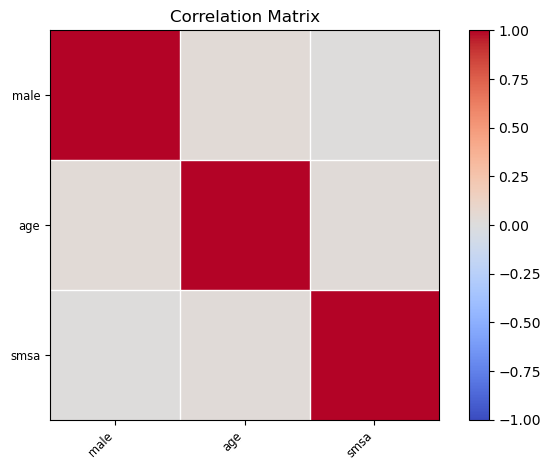

In [94]:
sm.graphics.plot_corr(corr_matrix, xnames=df.columns, normcolor=True, cmap='coolwarm')
plt.show()

In [95]:
df

,male,age,smsa
0,1,32,0
1,1,31,0
2,1,44,1
3,0,30,0
4,1,64,0
...,...,...,...
701,0,45,1
702,1,34,0
703,0,37,0
704,0,54,0
